# ニューラルネットワークとは
適切な重みパラメータをデータから自動で学習できるネットワーク。


## パーセプトロンの構造
ニューラルネットワークは、パーセプトロンを何層にも重ねることができる。最初の層を**入力層**、中間の層を**中間層**または**隠れ層**、最後の層を**出力層**という。

例として、$x_{1}$と$x_{2}$の２つの入力信号を受け取り、$y$を出力するパーセプトロンについて考える。この時、このパーセプトロンを数式で表すと、以下のようになる。

$y = 
\left \{
\begin{array}{l}
0　( b + w_{1}x_{1} + w_{2}x_{2} \leqq 0) \\
1　( b + w_{1}x_{1} + w_{2}x_{2} > 0)
\end{array}
\right.$

ここでは、$b$は**バイアス**と呼ばれるパラメーターで、ニューロンの発火（1を出力すること)のしやすさをコントロールするもの。また、$w_1$や$w_2$は各信号の**重み**を表すパラメーターで、各信号の重要度を決定する。また、この数式は以下のように書き換えることもできる。

$y = h(b + w_{1}x_{1} + w_{2}x_{2})$
<br>
<br>
$h(x) = 
\left \{
\begin{array}{l}
0　( x \leqq 0) \\
1　( x > 0)
\end{array}
\right.$

この式では、入力信号の総和を$h(x)$という関数によって出力$y$に変換している。このような入力信号の総和を出力信号に変換する関数は、一般に**活性化関数**と呼ばれる。

## 活性化関数
上記のように、閾値を境に出力が切り替わる活性化関数は、「ステップ関数」や「階段関数」と呼ばれる。そのため、パーセプトロンにおいては活性化関数として「ステップ関数」を使用している、と言うことができる。ニューラルネットワークでは、ステップ関数ではない関数を活性化関数として使用する。使用される代表的な関数としては、**シグモイド関数**や、**ReLU関数**などがある。

### シグモイド関数
１つ目のシグモイド関数は、以下のような式で表される。
<br>
<br>
$
h(x) = {\large \frac{1}{1 + \exp(-x)}}
$
<br>
<br>
この式における$\exp(-x)$は、$e^{-x}$を表す。($e$はネイピア数）

### ReLU関数
２つ目のReLU関数は、数式で表すと次のように表される。
<br>
<br>
$h(x) = 
\left \{
\begin{array}{l}
x　( x > 0) \\
0　( x \leqq 0)
\end{array}
\right.$

### ステップ関数と各関数との比較
それぞれの関数をpythonで実装し、グラフに描画すると以下のようになる。（後に説明するが、配列を扱えるほうが都合がいいため、NumPy配列を引数としてとれるような関数を今回は実装する。）

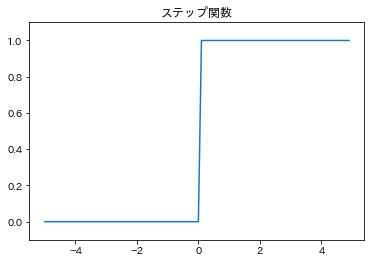

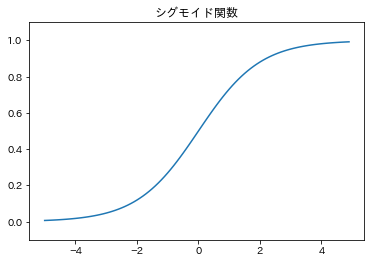

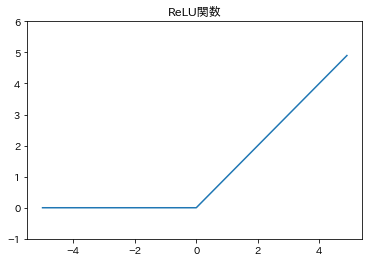

In [1]:
import numpy as np
import matplotlib.pylab as plt
import japanize_matplotlib
%matplotlib inline

def step_function(x): #ステップ関数の定義
    return np.array(x > 0, dtype = np.int64) #要素が0より大きいときはTrue(1)を返し、それをint型に変換して返す。

def sigmoid(x): #シグモイド関数の定義
    return 1 / (1 + np.exp(-x))

def relu(x): #ReLU関数の定義
    return np.maximum(0, x) #0とxのうち大きいほうを返す

x = np.arange(-5.0, 5.0, 0.1)

y1 = step_function(x)
plt.title('ステップ関数')
plt.plot(x, y1)
plt.ylim(-0.1, 1.1)
plt.show()

y2 = sigmoid(x)
plt.title('シグモイド関数')
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)
plt.show()

y3 = relu(x)
plt.title('ReLU関数')
plt.plot(x, y3)
plt.ylim(-1, 6)
plt.show()

これらの関数の共通点は、いずれも非線形関数であるということである。ニューラルネットワークにおいて、活性化関数には非線形関数を用いる必要がある。なぜなら、線形関数を活性化関数にしてしまうと、いくら隠れ層を深くしてもそれと同じ結果を生む隠れ層のないネットワークが存在するため、層を重ねることの意味がなくなってしまうからである。

## ニューラルネットワークと行列の積計算
ニューラルネットワークの計算は、出力の要素数が増えるほど計算の量が膨大になる。しかし、入力と重みを行列の形で表すことで、一度の計算で出力を行列の形で算出することができる。各層での計算は、入力を$x_m$、重みを$w_{nm}$、出力を$a_n$、バイアスを$b_n$とすると、以下のようになる。
<br>
<br>
$ \displaystyle a_l = b_l + \sum_{n=1}^m x_n w_{ln}$
<br>
<br>
これを行列を用いることで簡素に表せる。入力を$X$、重みを$W$、出力を$A$、バイアスを$B$とすると、以下のようになる。
<br>
<br>
$ A = WX + B$

## 3層ニューラルネットワークの実装
以上の行列計算を用いて、実際に3層ニューラルネットワークを実装する。3層ニューラルネットワークは、第0層は2つ、第1層は3つ、第2層は2つ、第3層は2
つのニューロンから構成される。（今回の実装では入力信号、重み、バイアスは適当な値を設定している。）

In [2]:
#0層目の入力信号、重み、バイアスを定義
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

#出力を計算して活性化関数（今回はシグモイド関数）で信号を変換する
A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print("出力:", A1)
print("変換後:", Z1)

出力: [0.3 0.7 1.1]
変換後: [0.57444252 0.66818777 0.75026011]


In [3]:
#1層目の重み、バイアスを定義
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print("出力:", A2)
print("変換後:", Z2)

出力: [0.51615984 1.21402696]
変換後: [0.62624937 0.7710107 ]


In [4]:
#2層目の重み、バイアスを定義
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

def identity_function(x): #出力層では今までと異なる活性化関数を使用することがあり、その関数をシグマ関数という。今回は恒等関数を使用する。
    return x

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print("出力:", A3)
print("結果:", Y)

出力: [0.31682708 0.69627909]
結果: [0.31682708 0.69627909]


## 出力層の設計
ニューラルネットワークは、分類問題と回帰問題の両方に用いることができる。出力層の活性化関数は、どちらの問題に用いるかによって変更する必要がある。一般に、回帰問題では恒等関数を、分類問題ではソフトマックス関数を用いる。

### 恒等関数とソフトマックス関数
恒等関数は、入力値をそのまま出力する関数。あえて数式に表すなら下記のようになる。
<br>
<br>
$ y_k = a_k$
<br>
<br>
一方、ソフトマックス関数は、次の式で表される。
<br>
<br>
$ y_k = \frac{\exp(a_k)}{\sum_{i=1}^{n} \exp(a_i)}$
<br>
<br>
pythonで実装すると以下のような関数になる。

In [5]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) #オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

指数関数を用いると、容易に大きな数値が計算に出現するため、オーバーフローの対策を行わなければならない。
<br>
この関数を用いてニューラルネットワークの出力を計算すると以下のようになる。

In [6]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


これで示したように、ソフトマックス関数がとる値は、0から1.0の間の実数になる。また、ソフトマックス関数の出力の総和は1となる。これらの性質から、ソフトマックス関数の出力は確率として解釈できる。例えば上の例では、各要素の確率はそれぞれおおよそ$y[0]$は0.018、$y[1]$は0.245、$y[2]$は0.737という風に解釈できる。そして、この結果から、二番目の要素が最も確率が高いから、答えは二番目のクラスであると言うことができる。また、確率を数値的に導出することもできる。
<br>
しかし注意として、ソフトマックス関数を適用しても各要素間の大小関係は変化しない。これは、指数関数が単調増加する関数であることに起因する。一般にニューラルネットワークのクラス分類問題では、一番出力の大きい要素のみを認識結果とする。そのため、クラス分類問題を扱う際には最大の値をとる要素がわかるだけでよいため、出力層のソフトマックス関数は省略されることが多い。

### 出力層のニューロンの数
出力層のニューロンの数は、解くべき問題に応じて適宜決める必要がある。一般にクラス分類では出力層のニューロン数は分類したいクラスの数に設定する。

## 手書き文字認識
実践的な内容として、手書きの数字の画像の分類を実装する。機械学習で問題を解く際には、「学習」と「推論」の二つのフェーズがあるが、ここでは、すでに学習が済んだパラメータを使用し、ニューラルネットワークの**推論処理**（**順方向伝播**ともいう）のみを実装する。

### MNISTデータセット
今回使用するデータセットは、MNISTという機械学習でも有名なデータセットの中の手書き数字の画像セット。今回はデータセットのダウンロード、画像データのNumPy配列への変換に、オライリー・ジャパン発行の「ゼロから作るDeepLearning - Pythonで学ぶディープラーニングの理論と実装」の中で提供されているmnist.pyの```load_mnist```関数を用いる。
<br>
- ```load_mnist()```
    - 返り値・・・(訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    - 引数
        - ```normalize```・・・入力値を0.0～1.0に正規化するかどうか
        - ```flatten```・・・入力画像を一次元配列にするかどうか
        - ```one_hot_label```・・・結果をone-hot表現で出力するかどうか

In [7]:
from mnist import load_mnist

### 推論処理実装
MNISTデータセットの画像サイズは28×28であり、0～9の10クラス分類を行うことから、今回は入力層が$28 \times 28 = 784$個、出力層が10個のニューロンでそれぞれ構成されるネットワークを実装する。また、隠れ層は2層で、それぞれ1つ目は50個、2つ目は100個のニューロンを持つものとする。（この2つの値は任意の値に変更可能）

In [12]:
import pickle

def get_data(): #データの取得と前処理
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network(): #学習済みの重みパラメータを読み込み
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x): #推論処理
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [15]:
%%time
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
CPU times: total: 1.59 s
Wall time: 1.97 s


テストデータで検証したところ、93.52%の精度で手書き数字を分類することができたことがわかる。

### バッチ処理
数値処理を行うライブラリの多くは、大きな行列計算に最適化されている。（バス帯域への負荷を軽減できるため。）そのため、先ほどは一次元配列で784個の要素を入力したのを、$ 100 \times 784$の二次元配列で入力することで、100枚分の画像データを一度に行列計算することができ、処理を効率化することができる。

In [16]:
%%time
x, t = get_data()
network = init_network()

batch_size = 100 #バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i + batch_size] #スライスを使って100枚ずつバッチとして取り出す
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) #一次元の要素ごとに最大値を取り出す
    accuracy_cnt += np.sum(p == t[i:i + batch_size]) #比較演算子を使用しbool値で正答数を加算する

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
CPU times: total: 516 ms
Wall time: 670 ms


```%%time```によって表示された処理にかかった時間を見ると、確かに処理が高速化されていることがわかる。